In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

from testsuite.utilities import Pareto_split
from testsuite.analysis import load_all #, plot_all_pareto_2d, PLOT_STYLE, plot_measure
from problem_setup import func, y, weighting, n_obj, n_dim

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from testsuite import optimisers
from pymoo.factory import get_performance_indicator
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import inspect

In [3]:
names = ['Mpoi', 'ParEgo', 'Saf_ei', 'Saf_$\\mu$', 'SmsEgo_ei', 'SmsEgo_$\\mu$', 'lhs']
true_names = ['MPoI', 'ParEGO', 'SAF: ei', 'SAF: $\mu$', 'SMS-EGO: ei', 'SMS-EGO: $\mu$', 'LHS']
D_names = {a:b for a, b in zip(names, true_names)}

In [4]:
OPTIMISER_NAMES = [cls[0].lower() for cls in inspect.getmembers(optimisers, inspect.isclass)
        if cls[1].__module__ == 'testsuite.optimisers']

In [5]:
def load_result(directory):
    result = load_all(directory, trailing_text = "_results.pkl")
    name = get_name_from_dir(directory)
    result['name'] = name
    return result

def get_name_from_dir(dir_string):
    bits = dir_string.split('_')
    name = [bit for bit in bits if bit.lower() in OPTIMISER_NAMES]

    if type(name) is list:
        name = name[0]
    if 'ei' in bits:
        name+='_ei'
    elif 'mean' in bits:
        name+='_$\mu$'
    return name

In [6]:
problem_path = './'

In [7]:
# load all results from directory tree
result_dirs = sorted(os.listdir(os.path.join(problem_path, "log_data/")))
results= []
for path in result_dirs:
    print(os.path.join(problem_path, 'log_data/',  path))
    result = load_result(os.path.join(problem_path, 'log_data/',  path))
    results.append(result)

./log_data/WFG2_Mpoi_init10_MultiSurrogate_Mpoi
./log_data/WFG2_ParEgo_init10
./log_data/WFG2_Saf_init10_MultiSurrogate_ei
./log_data/WFG2_Saf_init10_MultiSurrogate_mean
./log_data/WFG2_SmsEgoMu_init10_MultiSurrogate
./log_data/WFG2_SmsEgo_init10_MultiSurrogate
./log_data/WFG2_lhs_init10


In [8]:
for result in results:
    try:
        print(result['x'][0].shape)
    except:
        print(result['x'][0][0].shape)

(250, 4)
(250, 4)
(250, 4)
(250, 4)
(250, 4)
(250, 4)
(10, 4)


In [9]:
p = np.load('../igd_refpoints/problem_refpoints/data/wfg2_3d_refpoints')[::10]

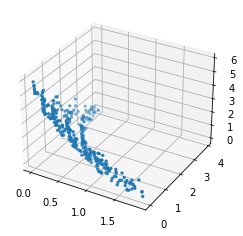

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*p.T, s=5)

In [11]:
y_maxs = np.concatenate([r['y'] for r in results if r['name'] != "lhs"], axis=0).reshape(-1, n_obj)
ref_point =  y_maxs.max(axis=0)

In [12]:
# setup measurement systems
hv_measure = get_performance_indicator("hv", ref_point=ref_point)
igdp_measure = get_performance_indicator("igd+", p)

In [13]:
D = {}
for result in tqdm(results):
    print(result['name'])
    y = np.array(result['y'])

    if result['name'] == 'lhs':
        hvs = np.zeros((y.shape[0], y.shape[1]+10))
        igdps = np.zeros((y.shape[0], y.shape[1]+10))
        for i, yi in tqdm(enumerate(y)):
            for j, yii in enumerate(yi):
                hvs[i, j+10] = hv_measure.calc(yii)
                igdps[i, j+10] = igdp_measure.calc(yii)
    else:
        hvs = np.zeros((y.shape[0], y.shape[1]))
        igdps = np.zeros((y.shape[0], y.shape[1]))
        for i, yi in tqdm(enumerate(y)):
            for j in range(1, y.shape[1]+1):
                hvs[i, j-1] = hv_measure.calc(yi[:j])
                igdps[i, j-1] = igdp_measure.calc(yi[:j])

    D[result['name']] = {'name':result['name'], 'hypervolume': hvs, 'igd+':igdps, 'y': result['y'], 'hv_ref': ref_point, 'igd_ref': p, 'x': result['x'], 'seed': result['seed']}


  0%|          | 0/7 [00:00<?, ?it/s]
0it [00:00, ?it/s]

Mpoi

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False




1it [00:05,  5.35s/it]
2it [00:09,  5.14s/it]
3it [00:14,  4.99s/it]
4it [00:20,  5.12s/it]
5it [00:25,  5.21s/it]
6it [00:30,  5.30s/it]
7it [00:36,  5.37s/it]
8it [00:41,  5.33s/it]
9it [00:46,  5.28s/it]
10it [00:55,  6.17s/it]
11it [01:02,  6.52s/it]
12it [01:10,  7.08s/it]
13it [01:18,  7.27s/it]
14it [01:27,  7.62s/it]
15it [01:34,  7.49s/it]
16it [01:41,  7.28s/it]
17it [01:45,  6.59s/it]
18it [01:50,  5.98s/it]
19it [01:56,  6.11s/it]
20it [02:05,  6.94s/it]
21it [02:13,  7.23s/it]
22it [02:20,  6.97s/it]
23it [02:28,  7.38s/it]
24it [02:36,  7.48s/it]
25it [02:42,  7.24s/it]
26it [02:47,  6.49s/it]
27it [02:52,  6.01s/it]
28it [02:58,  5.91s/it]
29it [03:06,  6.59s/it]
30it [03:14,  6.92s/it]
31it [03:21,  6.50s/it]
 14%|█▍        | 1/7 [03:21<20:08, 201.40s/it]
0it [00:00, ?it/s]

ParEgo



1it [00:07,  7.67s/it]
2it [00:15,  7.69s/it]
3it [00:20,  6.81s/it]
4it [00:24,  6.07s/it]
5it [00:28,  5.55s/it]
6it [00:33,  5.22s/it]
7it [00:38,  5.31s/it]
8it [00:43,  5.05s/it]
9it [00:47,  4.83s/it]
10it [00:52,  4.73s/it]
11it [00:57,  4.98s/it]
12it [01:04,  5.65s/it]
13it [01:12,  6.23s/it]
14it [01:19,  6.53s/it]
15it [01:25,  6.36s/it]
16it [01:33,  6.70s/it]
17it [01:40,  6.91s/it]
18it [01:47,  7.02s/it]
19it [01:55,  7.17s/it]
20it [02:03,  7.33s/it]
21it [02:10,  7.39s/it]
22it [02:17,  7.19s/it]
23it [02:23,  6.95s/it]
24it [02:30,  6.88s/it]
25it [02:34,  6.09s/it]
26it [02:38,  5.56s/it]
27it [02:43,  5.19s/it]
28it [02:47,  5.00s/it]
29it [02:52,  4.76s/it]
30it [02:56,  4.66s/it]
31it [03:00,  5.84s/it]
 29%|██▊       | 2/7 [06:22<16:16, 195.26s/it]
0it [00:00, ?it/s]

Saf_ei



1it [00:08,  8.90s/it]
2it [00:15,  8.30s/it]
3it [00:22,  7.81s/it]
4it [00:29,  7.54s/it]
5it [00:37,  7.82s/it]
6it [00:46,  8.08s/it]
7it [00:55,  8.37s/it]
8it [01:05,  8.68s/it]
9it [01:11,  7.97s/it]
10it [01:19,  7.93s/it]
11it [01:28,  8.42s/it]
12it [01:37,  8.55s/it]
13it [01:46,  8.64s/it]
14it [01:51,  7.68s/it]
15it [01:58,  7.32s/it]
16it [02:06,  7.68s/it]
17it [02:14,  7.64s/it]
18it [02:20,  7.20s/it]
19it [02:25,  6.62s/it]
20it [02:30,  6.18s/it]
21it [02:36,  5.85s/it]
22it [02:44,  6.75s/it]
23it [02:52,  6.91s/it]
24it [03:01,  7.62s/it]
25it [03:10,  8.02s/it]
26it [03:18,  8.16s/it]
27it [03:27,  8.21s/it]
28it [03:35,  8.32s/it]
29it [03:44,  8.49s/it]
30it [03:53,  8.60s/it]
31it [04:02,  7.82s/it]
 43%|████▎     | 3/7 [10:24<13:57, 209.40s/it]
0it [00:00, ?it/s]

Saf_$\mu$



1it [00:08,  8.56s/it]
2it [00:17,  8.66s/it]
3it [00:26,  8.71s/it]
4it [00:34,  8.59s/it]
5it [00:43,  8.62s/it]
6it [00:51,  8.54s/it]
7it [01:00,  8.55s/it]
8it [01:08,  8.42s/it]
9it [01:14,  7.79s/it]
10it [01:21,  7.42s/it]
11it [01:26,  6.66s/it]
12it [01:31,  6.43s/it]
13it [01:36,  5.99s/it]
14it [01:41,  5.63s/it]
15it [01:46,  5.41s/it]
16it [01:51,  5.34s/it]
17it [01:57,  5.56s/it]
18it [02:06,  6.49s/it]
19it [02:14,  7.03s/it]
20it [02:22,  7.36s/it]
21it [02:31,  7.58s/it]
22it [02:39,  7.85s/it]
23it [02:47,  8.02s/it]
24it [02:56,  8.18s/it]
25it [03:05,  8.39s/it]
26it [03:13,  8.35s/it]
27it [03:22,  8.52s/it]
28it [03:31,  8.53s/it]
29it [03:39,  8.40s/it]
30it [03:48,  8.60s/it]
31it [03:57,  7.65s/it]
 57%|█████▋    | 4/7 [14:21<10:53, 217.74s/it]
0it [00:00, ?it/s]

SmsEgoMu



1it [00:09,  9.55s/it]
2it [00:18,  9.32s/it]
3it [00:28,  9.52s/it]
4it [00:38,  9.65s/it]
5it [00:48,  9.75s/it]
6it [00:55,  9.07s/it]
7it [01:00,  7.84s/it]
8it [01:06,  7.14s/it]
9it [01:11,  6.64s/it]
10it [01:19,  6.95s/it]
11it [01:29,  7.78s/it]
12it [01:37,  8.09s/it]
13it [01:47,  8.42s/it]
14it [01:57,  8.96s/it]
15it [02:06,  9.15s/it]
16it [02:16,  9.44s/it]
17it [02:23,  8.56s/it]
18it [02:28,  7.58s/it]
19it [02:34,  6.99s/it]
20it [02:40,  6.59s/it]
21it [02:46,  6.40s/it]
22it [02:53,  6.85s/it]
23it [03:03,  7.73s/it]
24it [03:13,  8.36s/it]
25it [03:22,  8.59s/it]
26it [03:27,  7.58s/it]
27it [03:33,  6.99s/it]
28it [03:42,  7.64s/it]
29it [03:52,  8.36s/it]
30it [03:59,  8.02s/it]
31it [04:05,  7.92s/it]
 71%|███████▏  | 5/7 [18:27<07:32, 226.07s/it]
0it [00:00, ?it/s]

SmsEgo



1it [00:05,  5.46s/it]
2it [00:10,  5.42s/it]
3it [00:16,  5.62s/it]
4it [00:22,  5.55s/it]
5it [00:27,  5.47s/it]
6it [00:32,  5.38s/it]
7it [00:38,  5.40s/it]
8it [00:43,  5.37s/it]
9it [00:48,  5.37s/it]
10it [00:54,  5.39s/it]
11it [00:59,  5.42s/it]
12it [01:04,  5.37s/it]
13it [01:10,  5.40s/it]
14it [01:16,  5.49s/it]
15it [01:21,  5.55s/it]
16it [01:26,  5.42s/it]
17it [01:32,  5.49s/it]
18it [01:37,  5.44s/it]
19it [01:43,  5.44s/it]
20it [01:48,  5.47s/it]
21it [01:54,  5.45s/it]
22it [01:59,  5.45s/it]
23it [02:05,  5.45s/it]
24it [02:10,  5.46s/it]
25it [02:15,  5.34s/it]
26it [02:21,  5.40s/it]
27it [02:26,  5.22s/it]
28it [02:31,  5.32s/it]
29it [02:36,  5.29s/it]
30it [02:42,  5.37s/it]
31it [02:47,  5.40s/it]
 86%|████████▌ | 6/7 [21:14<03:28, 208.51s/it]
0it [00:00, ?it/s]

lhs



1it [00:04,  4.58s/it]
2it [00:09,  4.54s/it]
3it [00:13,  4.67s/it]
4it [00:18,  4.74s/it]
5it [00:23,  4.77s/it]
6it [00:28,  4.72s/it]
7it [00:32,  4.63s/it]
8it [00:37,  4.64s/it]
9it [00:42,  4.64s/it]
10it [00:46,  4.64s/it]
11it [00:51,  4.62s/it]
12it [00:56,  4.71s/it]
13it [01:00,  4.69s/it]
14it [01:05,  4.73s/it]
15it [01:10,  4.68s/it]
16it [01:14,  4.62s/it]
17it [01:19,  4.58s/it]
18it [01:23,  4.54s/it]
19it [01:28,  4.54s/it]
20it [01:32,  4.62s/it]
21it [01:37,  4.59s/it]
22it [01:42,  4.63s/it]
23it [01:47,  4.73s/it]
24it [01:51,  4.70s/it]
25it [01:56,  4.71s/it]
26it [02:01,  4.73s/it]
27it [02:06,  4.77s/it]
28it [02:10,  4.69s/it]
29it [02:15,  4.67s/it]
30it [02:21,  5.05s/it]
31it [02:26,  4.72s/it]
100%|██████████| 7/7 [23:41<00:00, 203.05s/it]


Mpoi
(31, 250)
ParEgo
(31, 250)
Saf_ei
(31, 250)
Saf_$\mu$
(31, 250)
SmsEgoMu
(31, 250)
SmsEgo
(31, 250)
lhs
(31, 251)


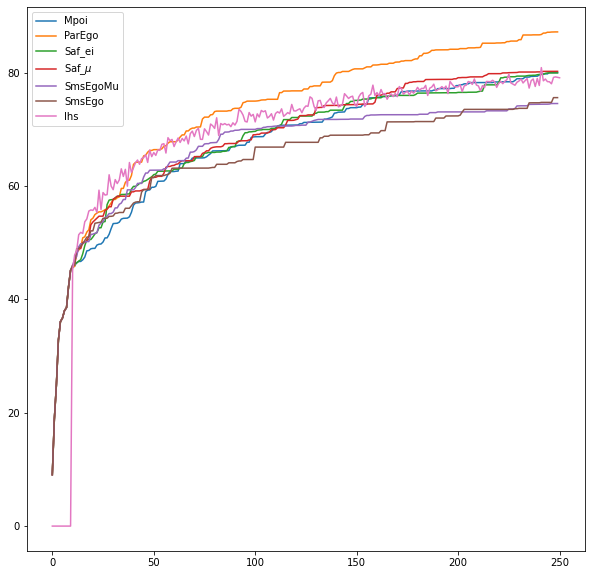

In [14]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca()
for name, d in D.items():
    print(name)
    print(np.shape(d['hypervolume']))
    ax.plot(np.median(d['hypervolume'], axis=0), label=name)
    
    
ax.legend()

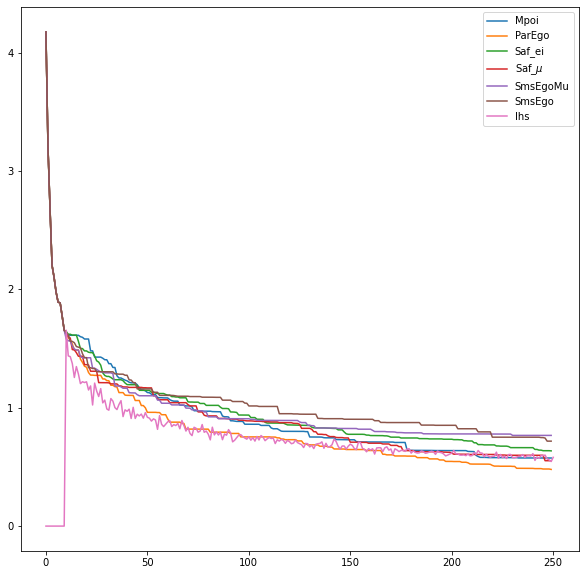

In [15]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca()
for name, d in D.items():
    ax.plot(np.median(d['igd+'], axis=0), label=name)
    
ax.legend()

In [41]:
%matplotlib qt

In [42]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
for name, d in D.items():
    if name != 'lhs':
        print(name)
#     for y in d['y']:
        y = d['y'][0]
        ax.scatter(*y.T, label=name)
ax.scatter(*p.T, color="lightgrey", alpha=0.2)
ax.legend()

Mpoi
ParEgo
Saf_ei
Saf_$\mu$
SmsEgoMu
SmsEgo


In [21]:
D.keys()

dict_keys(['Mpoi', 'ParEgo', 'Saf_ei', 'Saf_$\\mu$', 'SmsEgoMu', 'SmsEgo', 'lhs'])

In [31]:
import pickle as pkl
with open(os.path.join(problem_path, 'pkl_data/results__newsms_fixed.pkl'), 'wb') as outfile:
    pkl.dump(D, outfile)